# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [97]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [42]:
print(df.columns)
df.sample(5)

Index(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors', 'volunteer',
       'military', 'empholes', 'occupspecific', 'occupbroad', 'workinschool',
       'email', 'computerskills', 'specialskills', 'firstname', 'sex', 'race',
       'h', 'l', 'call', 'city', 'kind', 'adid', 'fracblack', 'fracwhite',
       'lmedhhinc', 'fracdropout', 'fraccolp', 'linc', 'col', 'expminreq',
       'schoolreq', 'eoe', 'parent_sales', 'parent_emp', 'branch_sales',
       'branch_emp', 'fed', 'fracblack_empzip', 'fracwhite_empzip',
       'lmedhhinc_empzip', 'fracdropout_empzip', 'fraccolp_empzip',
       'linc_empzip', 'manager', 'supervisor', 'secretary', 'offsupport',
       'salesrep', 'retailsales', 'req', 'expreq', 'comreq', 'educreq',
       'compreq', 'orgreq', 'manuf', 'transcom', 'bankreal', 'trade',
       'busservice', 'othservice', 'missind', 'ownership'],
      dtype='object')


,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
3037,b,308,4,3,8,1,1,0,1,387,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,
3105,252,32,4,6,8,0,1,0,0,267,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Private
2094,b,215,3,5,26,1,1,0,1,313,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,
3205,105,35,4,3,7,0,0,0,1,274,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,
4768,b,9,4,3,2,0,0,0,0,317,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Private


In [67]:
df.loc[:, ['race','call']].sample(9)

,race,call
3638,w,0.0
3380,w,0.0
1945,b,0.0
1183,w,0.0
2262,w,0.0
2237,w,0.0
661,b,0.0
4145,b,1.0
1805,w,0.0


## Checking basic stats of black sounding names

In [71]:
# number of callbacks for black-sounding names
callbacks_b=sum(df[df.race=='b'].call)

# number of callbacks for white-sounding names
callbacks_w=sum(df[df.race=='w'].call)

In [72]:
#% of black-sounding names
total_pop_b=df[df.race=='b'].race.size
print('Percentage of Black Sounding Candidates that where callback:', round(callbacks_b/total_pop_b *100,2),'%')

Percentage of Black Sounding Candidates that where callback: 6.45 %


In [73]:
#% of white-sounding names
total_pop_w=df[df.race=='w'].race.size
print('Percentage of White Sounding Candidates that where callback:', round(callbacks_w/total_pop_w *100,2),'%')

Percentage of White Sounding Candidates that where callback: 9.65 %


# Q1 What test is appropriate for this problem? Does CLT apply?
We will use two sample t test to test to establish whether race has a significant impact on the rate of callbacks for resumes. 

# Q2 What are the null and alternate hypotheses?
$H_o$: There is no significant impact on the rate of callbacks **rates** between black and white sounding names (identical average scores) 

$H_1$: There is a significant impact on the rate of callbacks **rates** between black and white sounding names.

# Q3 Compute margin of error, confidence interval, and p-value.

Calculating Variance and stdDev of callback percentage of back and white sounding names

In [92]:
var_b=(callbacks_b/total_pop_b) * (1- (callbacks_b/total_pop_b))/total_pop_b
var_w=(callbacks_w/total_pop_w) * (1- (callbacks_w/total_pop_w))/total_pop_w
stdDev_b=np.sqrt(var_b)
stdDev_w=np.sqrt(var_w)

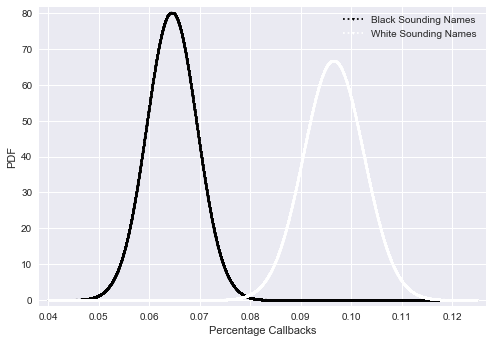

In [257]:
x = np.linspace(0.04,0.125,df.call.size)
#x=np.linspace(df.call.mean()-1,df.call.mean()+1,df.call.size)
#x = np.linspace((df.min()-1),(df.max()+1), len(df)) 

y_b = stats.norm.pdf(x, loc=(callbacks_b/total_pop_b), scale=stdDev_b)    
y_w = stats.norm.pdf(x, loc=(callbacks_w/total_pop_w), scale=stdDev_w)    
_=plt.plot(x,y_b,marker='v',linestyle=':',markersize=3,color='black',label='Black Sounding Names')
_=plt.plot(x,y_w,marker='v',linestyle=':',markersize=3,color='white',label='White Sounding Names')

_=plt.xlabel('Percentage Callbacks')
_=plt.ylabel('PDF')
#_=plt.vlines((1-(callbacks_b/total_pop_b)),0, 1, color='red',label=[format(percentage_b, '.2f'), \
#                                                                   'Callbacks -Black Sounding Names'])
_=plt.legend(loc='upper right')
plt.margins(0.02)
plt.show()
#marker, markersize, markeredgewidth, markeredgecolor, markerfacecolor, markerfacecoloralt


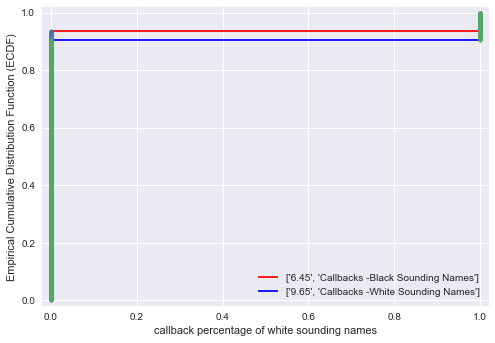

In [181]:
#Empirical Cumulative Distribution Function (ECDF)
x=sorted(df[df.race=='b'].call)
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('callback percentage of back sounding names')
_=plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
_=plt.hlines((1-(callbacks_b/total_pop_b)),0, 1, color='red',label=[format(percentage_b, '.2f'), \
                                                                    'Callbacks -Black Sounding Names'])
_=plt.legend(loc='lower right')
plt.margins(0.02)


#Empirical Cumulative Distribution Function (ECDF)
x=sorted(df[df.race=='w'].call)
y=np.arange(1,len(x)+1)/len(x)
_=plt.plot(x,y,marker='.',linestyle='none')
_=plt.xlabel('callback percentage of white sounding names')
_=plt.ylabel('Empirical Cumulative Distribution Function (ECDF)')
_=plt.hlines((1-(callbacks_w/total_pop_w)),0, 1, color='blue',label=[format(percentage_w, '.2f'), \
                                                                     'Callbacks -White Sounding Names'])
_=plt.legend(loc='lower right')
plt.margins(0.02)

plt.show()

We can see that ECDF is not that helpful. Let us plan to calculate Margin of Error and Confidence Interval and Pvalue

Quick Note: Since we took two independent samples from the same population( White and Black) we can use the below test. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g.5%, then we reject the null hypothesis of equal averages.

In [264]:
print('Pvalue:',stats.ttest_ind(df[df.race=='b'].call,df[df.race=='w'].call, equal_var = False)[1])

Pvalue: 3.94294151365e-05


### Observation: Based on the above pValue we can reject the null Hypothesis. 

z score for 95% CL is 1.96 

we took this from z-score table 
90% – Z Score = 1.645 

95% – Z Score = 1.96 

99% – Z Score = 2.576

margin_of_error =zScore * stdDev


In [279]:
margin_of_error_b =1.96 * stdDev_b

In [283]:
import scipy.stats as stats
CI_low_b,CI_hi_b=stats.t.interval(0.95, len(df[df.race=='b'].call)-1,
                              loc=np.mean(df[df.race=='b'].call),
                              scale=stats.sem(df[df.race=='b'].call))

In [286]:
print('Confidence Interval of Back sounding names ranges from:', CI_low_b,' and ',CI_hi_b)

Confidence Interval of Back sounding names ranges from: 0.0547145496045  and  0.0742382218208


# Q4 Write a story describing the statistical significance in the context or the original problem.

We have 95% confidence that the percentage of callbacks in black and white sounding names ranges from 0.054 to 0.074. Based on the given sample it appears that race does play a role in callbacks.

# Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The given sample data can't prove that race is the only determining criteria for callbacks. Callbacks can have other cofounding data points which are not analyzed or presented. We need to collect different samples and include factors like the commute, other demographics, success among other important decision making features.